In [3]:
import numpy as np
import cv2 as cv
import math
import matplotlib.pyplot as plt

# Practica 6

# Traslacion

In [26]:
img = cv.imread("cheems.jpg",0)
rows,cols = img.shape

M = np.float32([[1,0,100],[0,1,50]])
dst = cv.warpAffine(img,M,(cols,rows))

cv.imshow('img',dst)

cv.waitKey(0)
cv.destroyAllWindows()

# Escala

In [27]:
img = cv.imread("cheems.jpg",0)
height, width = img.shape[:2]

res = cv.resize(img,(2*width, 2*height), interpolation = cv.INTER_CUBIC)

cv.imshow('img',res)

cv.waitKey(0)
cv.destroyAllWindows()

# Rotacion

In [28]:
img = cv.imread("cheems.jpg",0)
rows,cols = img.shape

M = cv.getRotationMatrix2D(((cols-1)/2.0,(rows-1)/2.0),45,1)
dst = cv.warpAffine(img,M,(cols,rows))

cv.imshow('img',dst)

cv.waitKey(0)
cv.destroyAllWindows()

# Corte

In [29]:
img = cv.imread("cheems.jpg",0)
rows,cols = img.shape

pts1 = np.float32([[83,90],[447,90],[83,472]])
pts2 = np.float32([[83,90],[447,90],[170,472]])
M = cv.getAffineTransform(pts1,pts2)
dst = cv.warpAffine(img,M,(cols,rows))

cv.imshow('img',dst)

cv.waitKey(0)
cv.destroyAllWindows()

# Pruebas traslacion

In [31]:
def traslacion(imagen,matriz):
    #se hizo un cambio en tx ty
    a=matriz[0][0]
    b=matriz[0][1]
    tx=matriz[1][2]
    c=matriz[1][0]
    d=matriz[1][1]
    ty=matriz[0][2]
    
    modificado= np.zeros((len(imagen),len(imagen[0]),1),np.uint8)
    
    for i in range(len(imagen)):
        for j in range(len(imagen[i])):
            if (a*i+b*j+tx)<(len(imagen)) and (c*i+d*j+ty)<(len(imagen[i])):
                modificado[int(a*i+b*j+tx)][int(c*i+d*j+ty)]=imagen[i][j]
    
    return modificado

In [32]:
img = cv.imread("cheems.jpg",0)
rows,cols = img.shape

M = np.float32([[1,0,100],[0,1,50]])
dst = traslacion(img,M)

cv.imshow('propio',dst)

dst = cv.warpAffine(img,M,(cols,rows))

cv.imshow('de OpenCV',dst)

cv.waitKey(0)
cv.destroyAllWindows()

# Pruebas scale

In [1]:
def scale(imagen,factor1,factor2):    
    modificado= np.zeros((len(imagen)*factor1,len(imagen[0])*factor2,1),np.uint8)
    
    for i in range(len(imagen)):
        for j in range(len(imagen[i])):
            for k in range(factor1):
                for l in range(factor2):
                    modificado[int(i*factor1+k)][int(j*factor2+l)]=imagen[i][j]
                    
    return modificado

In [34]:
img = cv.imread("cheems2.jpg",0)

cv.imshow('img',img)
dst = scale(img,4,4)
cv.imshow('img 2',dst)

cv.waitKey(0)
cv.destroyAllWindows()

In [36]:
img = cv.imread("cheems2.jpg",0)
rows,cols = img.shape
scale=4
stretch_near = cv.resize(img, (rows*scale, cols*scale),interpolation = cv.INTER_NEAREST)

cv.imshow('img ',stretch_near)

cv.waitKey(0)
cv.destroyAllWindows()

# Pruebas rotacion

In [37]:
def rotacion(image, matrix, width, height):
    dst = np.zeros((width, height, 3), dtype=np.uint8)
    oldh, oldw = image.shape[:2]
    for u in range(width):
        for v in range(height):
            x = u*matrix[0,0]+v*matrix[0,1]+matrix[0,2]
            y = u*matrix[1,0]+v*matrix[1,1]+matrix[1,2]
            intx, inty = int(x), int(y)
            if 0 < x < oldw and 0 < y < oldh:
                dst[u, v] = image[intx, inty]
    return dst

In [38]:
img = cv.imread("cheems.jpg",0)
rows,cols = img.shape

M = cv.getRotationMatrix2D(((cols-1)/2.0,(rows-1)/2.0),45,1)
#M = np.float32([[1,0,100],[0,1,50]])
dst = rotacion(img,M,rows,cols)

cv.imshow('propio',dst)

cv.waitKey(0)
cv.destroyAllWindows()

# Pruebas Corte

In [39]:
def corte(pts1, pts2):
    resp = np.float32([[1, 0, 0], [0, 1, 0]])
    n_pts = pts1.shape[0]
    ones = np.ones((n_pts, 1), pts1.dtype)
    pts1_ = np.hstack([pts1, ones])
    pts2_ = np.hstack([pts2, ones])

    A, res, rank, s = np.linalg.lstsq(pts1_, pts2_,rcond=None)

    if rank == 3:
        resp = np.float32([
            [A[0, 0], A[1, 0], A[2, 0]],
            [A[0, 1], A[1, 1], A[2, 1]]
        ])
    elif rank == 2:
        resp = np.float32([
            [A[0, 0], A[1, 0], 0],
            [A[0, 1], A[1, 1], 0]
        ])

    return resp

In [40]:
img = cv.imread('cheems.jpg')
rows,cols,ch = img.shape

pts1 = np.float32([[50,50],[200,50],[50,200]])
pts2 = np.float32([[10,100],[200,50],[100,250]])

M = cv.getAffineTransform(pts1,pts2)
dst = cv.warpAffine(img,M,(cols,rows))

cv.imshow('img ',dst)

cv.waitKey(0)
cv.destroyAllWindows()

# Affine

In [11]:
def warpAff(image, matrix, width, height):
    dst = np.zeros((width, height, 3), dtype=np.uint8)
    oldh, oldw = image.shape[:2]
    for u in range(width):
        for v in range(height):
            x = u*matrix[0,0]+v*matrix[0,1]+matrix[0,2]
            y = u*matrix[1,0]+v*matrix[1,1]+matrix[1,2]
            intx, inty = int(x), int(y)
            if 0 < x < oldw and 0 < y < oldh:
                dst[u, v] = image[intx, inty]
    return dst

# Pixel Replication

In [4]:
img = cv.imread("cheems2.jpg",0)

cv.imshow('img',img)
dst = scale(img,3,3)
cv.imshow('img 2',dst)

cv.waitKey(0)
cv.destroyAllWindows()

In [5]:
img = cv.imread("cheems2.jpg",0)
rows,cols = img.shape
scale=3
stretch_near = cv.resize(img, (rows*scale, cols*scale),interpolation = cv.INTER_NEAREST)

cv.imshow('img ',stretch_near)

cv.waitKey(0)
cv.destroyAllWindows()

# Nuevas partes

In [6]:
image = cv.imread("cheems.jpg",0)
height, width = image.shape[:2]
center = (width/2, height/2)

rotate_matrix = cv.getRotationMatrix2D(center=center, angle=80, scale=1)
rotated_image = cv.warpAffine(src=image, M=rotate_matrix, dsize=(width, height))


In [7]:
cv.imshow('Original image', image)
cv.imshow('Rotated image', rotated_image)

cv.waitKey(0)

-1

In [8]:
def degree(ang):
    return (ang*2*math.pi/360)

def preparacion(img, ang):
    if (ang>90 and ang<180):
        h, b = image.shape[:2] 
        h_n=int(b*math.sin(degree(ang%90))+h*math.cos(degree(ang%90)))
        b_n=int(h*math.sin(degree(ang%90))+b*math.cos(degree(ang%90)))

        print(str(h)+"-"+str(b)+" "+str(h_n)+"-"+str(b_n))

        modificado= np.zeros((b_n,h_n,1),np.uint8)

        b_s=(b_n-h)//2
        h_s=(h_n-b)//2
        for i in range(b):
            for j in range(h):
                modificado[i+b_s][j+h_s]=img[i][j]
    else:
        h, b = image.shape[:2] 
        h_n=int(h*math.sin(degree(ang))+b*math.cos(degree(ang)))
        b_n=int(b*math.sin(degree(ang))+h*math.cos(degree(ang)))

        print(str(h)+"-"+str(b)+" "+str(h_n)+"-"+str(b_n))

        modificado= np.zeros((b_n,h_n,1),np.uint8)

        b_s=(b_n-b)//2
        h_s=(h_n-h)//2
        for i in range(b):
            for j in range(h):
                modificado[i+b_s][j+h_s]=img[i][j]
    
    return modificado
    

In [10]:
ang=70

image = cv.imread("cheems.jpg",0)
img=preparacion(image, ang)
h, b = img.shape[:2]
center = (b/2, h/2)

rotate_matrix = cv.getRotationMatrix2D(center=center, angle=ang, scale=1)
rotated_image = cv.warpAffine(src=img, M=rotate_matrix, dsize=(b, h))

cv.imshow('Original image', image)
cv.imshow('Rotated image', rotated_image)

cv.waitKey(0)

600-600 769-769


-1

[[  1.26666667   0.6        -83.33333333]
 [ -0.33333333   1.          66.66666667]]


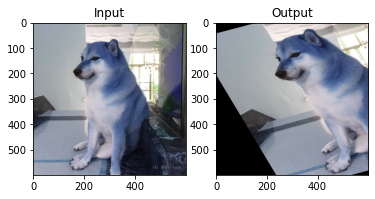

In [11]:
img = cv.imread('cheems.jpg')
rows,cols,ch = img.shape
pts1 = np.float32([[50,50],[200,50],[50,200]])
pts2 = np.float32([[10,100],[200,50],[100,250]])
M = cv.getAffineTransform(pts1,pts2)
print(M)
dst = cv.warpAffine(img,M,(cols,rows))
plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()

In [12]:
def corte(pts1, pts2):
    resp = np.float32([[1, 0, 0], [0, 1, 0]])
    n_pts = pts1.shape[0]
    ones = np.ones((n_pts, 1), pts1.dtype)
    pts1_ = np.hstack([pts1, ones])
    pts2_ = np.hstack([pts2, ones])

    A, res, rank, s = np.linalg.lstsq(pts1_, pts2_,rcond=None)

    if rank == 3:
        resp = np.float32([
            [A[0, 0], A[1, 0], A[2, 0]],
            [A[0, 1], A[1, 1], A[2, 1]]
        ])
    elif rank == 2:
        resp = np.float32([
            [A[0, 0], A[1, 0], 0],
            [A[0, 1], A[1, 1], 0]
        ])

    return resp

In [15]:
pts1 = np.float32([[50,50],[200,50],[50,200]])
pts2 = np.float32([[10,100],[200,50],[100,250]])
print(corte(pts1, pts2))

[[  1.2666667    0.6        -83.333336  ]
 [ -0.33333334   1.          66.666664  ]]


[[  1.2666667    0.6        -83.333336  ]
 [ -0.33333334   1.          66.666664  ]]


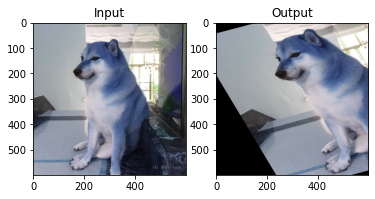

In [13]:
img = cv.imread('cheems.jpg')
rows,cols,ch = img.shape
pts1 = np.float32([[50,50],[200,50],[50,200]])
pts2 = np.float32([[10,100],[200,50],[100,250]])
M = corte(pts1,pts2)
print(M)
dst = cv.warpAffine(img,M,(cols,rows))
plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()